# Autoencoder Digits Example
**Train Stacked Autoencoders for Image Classification**

This example shows how to train stacked autoencoders to classify images of digits. 

Neural networks with multiple hidden layers can be useful for solving classification problems with complex data, such as images. Each layer can learn features at a different level of abstraction. however, training neural networks with multiple hidden layers can be difficult in practice. One way to effectively train a neural network with multiple layers is by training one layer at a time. You can achieve this by training a special type of network known as an autoencoder for each desired hidden layer.

This example shows you how to train a neural network with two hidden layers to classify digits in the images. First you train the hidden layers individually in an unsupervised fashion using autoencoders. Then you train a final softmax layer, and join the layers together to form a stacked network, which you train one final time in a supervised fashion. 


(5000, 784)
(5000, 784)
<class 'numpy.ndarray'>
[0 0 1 0 0 0 0 0 0 0]


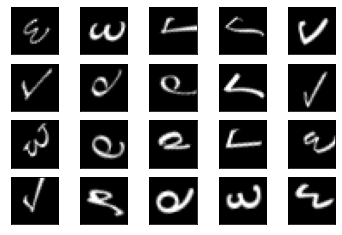

In [1]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt

## Data set

x_train = array([[0,0,0,0,0,0,0,5],[0,0,0,0,0,0,5,0],[0,0,0,0,0,5,0,0],[0,0,0,0,5,0,0,0],[0,0,0,5,0,0,0,0],[0,0,5,0,0,0,0,0],
                [0,5,0,0,0,0,0,0],[5,0,0,0,0,0,0,0]])
y_train = array([[0,0,0,0,0,0,0,1],[0,0,0,0,0,0,1,0],[0,0,0,0,0,1,0,0],[0,0,0,0,1,0,0,0],[0,0,0,1,0,0,0,0],[0,0,1,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],[1,0,0,0,0,0,0,0]])

plt.show()  

print(x_train.shape)
print(type(x_train))
print(y_train[0])


The labels for the images are stored in a 10-by-5000 matrix, where in  every column a single element will be 1 to indicate the class that the  digit belongs to, and all other elements in the column will be 0. It  should be noted that if the tenth element is 1, then the digit image is a zero.

In [2]:
## Training the first autoencoder
# Begin by training a sparse autoencoder on the training data without using
# the labels
# 
# An autoencoder is a neural network which attempts to replicate its input
# at its output. Thus, the size of its input will be the same as the size
# of its output. When the number of neurons in the hidden layer is less
# than the size of the input, the autoencoder learns a compressed
# representation of the input. 
# 
# Nueral networkds have weights randomly initialized before training
# Therefore the results from training are different each time. To avoid
# this behavior, explicitly set the random number generator seed.
np.random.seed(0)

In [3]:
## 
# Set the size of the hidden layer for the autoencoder. For the autoencoder
# that you are going to train, it is a good idea to make this smaller than
# the input size.
hiddenSize1 = 3

In [4]:
import keras
from keras import layers
## 
# The type of autoencoder that you will train is an autoencoder. The autoencoder
# consists of two layers, the first layer consists of 100 sigmoid neurons which
# encodes the image into a 100 length feature vector. 
# The decoder layer learns the mapping from the encoded feature vector back to 
# the original image. 

in_size = 8
#Autoencoder layer 1
in_binary = keras.Input(shape=(in_size,))  # Specify input shape
print(type(in_binary))
print(in_binary.shape)
encoded = layers.Dense(hiddenSize1, activation='tanh',name='Encoder')(in_binary) # Encoder Layer
decoded = layers.Dense(in_size, activation='sigmoid', name = 'Decoder')(encoded)  # decoder layer

# Create the network model
autoencoder = keras.Model(in_binary, decoded)
# We also create a model for only the encoder section of the network
encoder = keras.Model(in_binary, encoded)
# Initialize the weights and specify our loss function (for measuring training 
# error)
autoencoder.compile(optimizer='adam', loss='MeanSquaredError')
# Run unsupervised training on the training set. We run the training for 50 epochs.
autoencoder.fit(x_train, y_train, epochs=3000, batch_size=8,shuffle=True, validation_data=(x_train, x_train))
print(x_train)

<class 'tensorflow.python.framework.ops.Tensor'>
(None, 784)
Epoch 1/400
20/20 [==============================] - 0s 4ms/step - loss: 0.1372
Epoch 2/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0527
Epoch 3/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0461
Epoch 4/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0452
Epoch 5/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0448
Epoch 6/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0446
Epoch 7/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0443
Epoch 8/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0441
Epoch 9/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0438
Epoch 10/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0435
Epoch 11/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0431
Epoch 12/400
20/20 [==============================] - 0s 

20/20 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 102/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 103/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 104/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 105/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 106/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 107/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 108/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 109/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 110/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 111/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 112/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 113/400
20/20 [=========

20/20 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 202/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 203/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 204/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 205/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 206/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 207/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 208/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 209/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 210/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 211/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 212/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 213/400
20/20 [=========

20/20 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 302/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 303/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 304/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 305/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 306/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 307/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 308/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 309/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 310/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 311/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 312/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 313/400
20/20 [=========

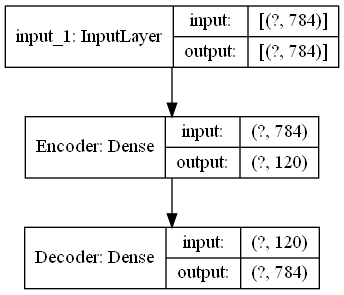

In [5]:
##
# You can view a diagram of the autoencoder. The autoencoder is comprised
# of an encoder followed by a decoder. The encoder maps an input to a 
# hidden representation, and the decoder attempts to reverse this mapping
# to reconstruct the original input.

from keras.utils import plot_model
plot_model(autoencoder, to_file='model.png',show_shapes=True, show_layer_names=True)

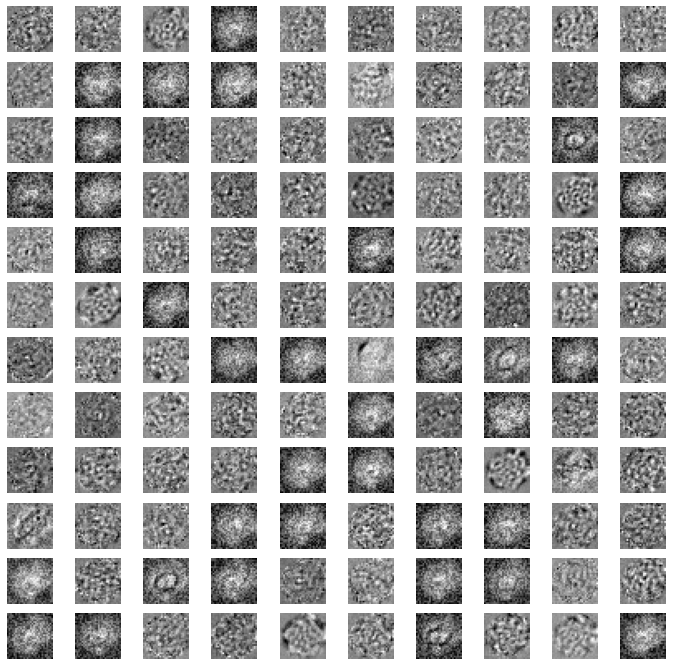

In [6]:
## Visualizing the weights of the first autoencoder
# The mapping learned by the encoder part of an autoencoder can be useful
# for extracting features from data. Each neuron in the encoder has a
# vector of weights associated with it which will be tuned to respond to a
# particular visual feature. You can view a representation of these
# features.

import math
n_cols = math.ceil(hiddenSize1 / 10)
fig = plt.figure(figsize=(12,12))


for i in range(hiddenSize1):
  w = autoencoder.layers[1].get_weights()[0][:,i].reshape(28,28)
  plt.subplot(n_cols, 10, i+1)
  plt.imshow(w,cmap='gray')
  plt.axis("off")
  
plt.show()

In [7]:
##
# The 100-dimensional output from the hidden layer of the autoencoder is a
# compressed version of the input. Train the next autoencoder on a set of these
# vectors extracted from the training data. First, you must use the encoder
# from the trained autoencoder to generate the features.
feat1 = encoder.predict(x_train)
hiddenSize2 = 40

In [8]:
## Training the second autoencoder
# After training the first autoencoder, you train the second autoencoder in
# a similar way. The main difference is that you use the features that were
# generated from the first autoencoder as the training data in the second
# autoencoder. Also, you decrease the size of the hidden representation to
# 50, so that the encoder in the second autoencoder learns an even smaller
# representation of the input data.

in_img2 = keras.Input(shape=(hiddenSize1,))
encoded2 = layers.Dense(hiddenSize2, activation='sigmoid',name="Encoder_2")(in_img2)
decoded2 = layers.Dense(hiddenSize1, activation='sigmoid',name= "Decoder_2")(encoded2)

autoencoder2 = keras.Model(in_img2, decoded2)
encoder2 = keras.Model(in_img2, encoded2)
autoencoder2.compile(optimizer='adam', loss='MeanSquaredError')


autoencoder2.fit(feat1, feat1, epochs=100, batch_size=256,shuffle=True)

Epoch 1/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1343
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1012
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0818
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0710
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0660
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0639
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0629
Epoch 8/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0624
Epoch 9/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0620
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0618
Epoch 11/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0615
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0613
Epoch 13/100
20/20 [=================

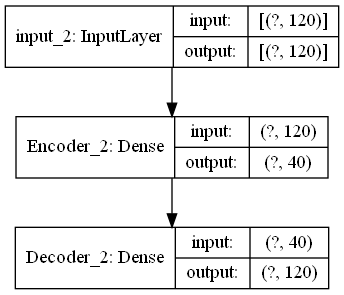

In [9]:
##
# Once again, you can view the autoencoder structure using plot model
plot_model(autoencoder2, to_file='model.png',show_shapes=True, show_layer_names=True)

In [10]:
##
# You can extract a second set of features by passing the previous set
# through the encoder from the second autoencoder.

feat2 = encoder2.predict(feat1)

In [11]:
from tensorflow.keras.utils import to_categorical
##
# The original vectors in the training data had 784 dimensions. After
# passing them through the first encoder, this was reduced to 100
# dimensions. After using the second encoder, this was reduced again to 50
# dimensions. You can now train a final layer to classify these 
# 50-dimensional vectors into different digit classes.

## Training the final softmax layer
# Train a softmax layer to classify the 50-dimensional feature vectors.
# Unlike the autoencoders, you train the softmax layer in a supervised
# fashion using labels for the training data.

soft_in = keras.Input(shape=(hiddenSize2,))
soft_layer = layers.Dense(10,activation='softmax', name="Softmax")(soft_in)

softnet = keras.Model(soft_in, soft_layer)
softnet.compile(optimizer='adam', loss='MeanSquaredError')

softnet.fit(feat2, y_train, epochs=100, batch_size=256,shuffle=True)

Epoch 1/100
20/20 [==============================] - 0s 898us/step - loss: 0.0939
Epoch 2/100
20/20 [==============================] - 0s 898us/step - loss: 0.0913
Epoch 3/100
20/20 [==============================] - 0s 945us/step - loss: 0.0904
Epoch 4/100
20/20 [==============================] - 0s 848us/step - loss: 0.0900
Epoch 5/100
20/20 [==============================] - 0s 798us/step - loss: 0.0897
Epoch 6/100
20/20 [==============================] - 0s 834us/step - loss: 0.0893
Epoch 7/100
20/20 [==============================] - 0s 906us/step - loss: 0.0890
Epoch 8/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0887
Epoch 9/100
20/20 [==============================] - 0s 997us/step - loss: 0.0883
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0880
Epoch 11/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0877
Epoch 12/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0873
Epoch 13/100
20/20 [=

Epoch 100/100
20/20 [==============================] - 0s 748us/step - loss: 0.0687


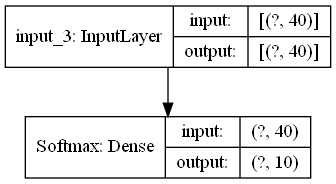

In [12]:
##
# Viewing the structure of the sofmax network
plot_model(softnet, to_file='model.png',show_shapes=True, show_layer_names=True)

In [13]:
enc1 = encoder.predict(x_test)
enc2 = encoder2.predict(enc1)
y_out = softnet.predict(enc2)
y_classified = np.argmax(y_out, axis=1)

In [14]:
## Forming a stacked neural network
# You have trained three separate components of a stacked neural network in
# isolation. 

# As was explained, the encoders from the autoencoders have been used to
# extract features. You can stack the encoders from the autoencoders 
# together with the softmax layer to form a stacked network for classification.

#First we must specify the structure of our stacked model
stacked_in = keras.Input(shape=(in_size,))
layer1 = layers.Dense(hiddenSize1, activation='sigmoid')(stacked_in)
layer2 = layers.Dense(hiddenSize2, activation='sigmoid')(layer1)
layer3 = layers.Dense(10, activation='softmax')(layer2)

#Then the model must be created and initialized.
stacked_ae = keras.Model(stacked_in, layer3)
stacked_ae.compile(optimizer="adam", loss = "MeanSquaredError")

# Then we transfer the weights from our previously trained layers. 
stacked_ae.layers[0].set_weights(autoencoder.layers[0].get_weights())
stacked_ae.layers[1].set_weights(autoencoder.layers[1].get_weights())
stacked_ae.layers[2].set_weights(autoencoder2.layers[1].get_weights())
stacked_ae.layers[3].set_weights(softnet.layers[1].get_weights())

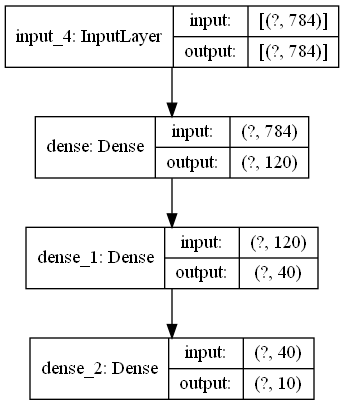

In [15]:
##
# View the stacked network
plot_model(stacked_ae, to_file='model.png',show_shapes=True, show_layer_names=True)

In [16]:
##
# You can visualize the results with a confusion matrix.
import seaborn as sn
def plot_confusion_matrix(y_classified, y_true):
  # Compute confusion matrix
  c_mat = np.zeros((10,10))
  for i in range(len(y_true)):
    c_mat[y_classified[i], y_true[i] ] += 1

  group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

  accuracy = (np.sum(np.logical_and(y_classified, y_true))/ len(y_true)) * 100

  plt.figure(figsize=(12,10))
  sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
  plt.title("Confusion Matrix")
  plt.ylabel('Output Class')
  plt.xlabel('Target Class \n Accuracy: ' + '%.2f'%accuracy + "%")

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


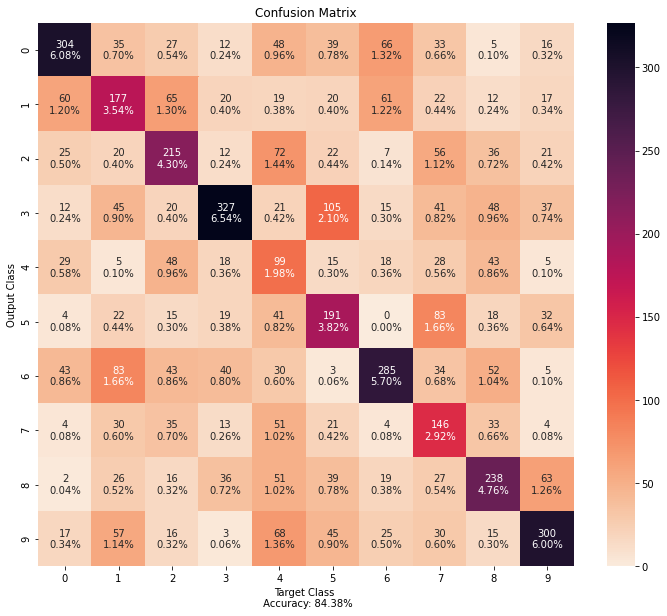

In [17]:
# Run x_Test through the stacked autoencoder. 
y_stacked = stacked_ae.predict(x_test)
# we need to convert it from 1 hot format back to the mnist labeling.
y_classified = np.argmax(y_stacked, axis=1)


y_true = np.argmax(y_test, axis=1)
print(type(y_classified))
print(type(y_true))
# plot confusion matrix
plot_confusion_matrix(y_classified, y_true)

In [18]:
## Fine tuning the stacked neural network
# The results for the stacked neural network can be improved by performing
# backpropagation on the whole multilayer network. This process is often
# referred to as fine tuning.
#
# You fine tune the network by retraining it on the training data in a
# supervised fashion. Before you can do this, you have to reshape the
# training images into a matrix, as was done for the test images.

stacked_ae.fit(x_train, y_train, epochs=100,batch_size = 256, shuffle=True)

Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0572
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0540
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0511
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0487
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0464
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0446
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0426
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0408
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0392
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0377
Epoch 13/100
20/20 [=================

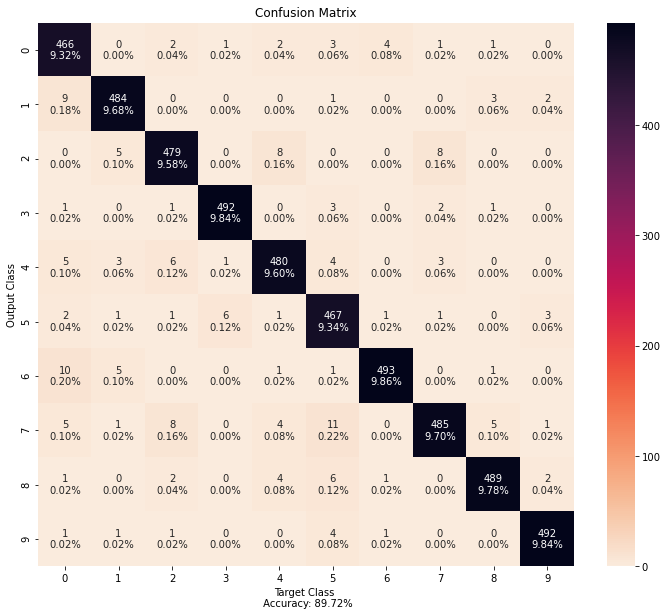

In [19]:
# Finally,view the results of the fine tuning on the confusion matrix. 
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

# plot confusion matrix
y_true = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_classified, y_true)